## Préliminaires - prise de connaissance des données

#### Importations des modules et des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
#import scipy.stats as st
#import statsmodels.api as sm
#from sklearn.datasets import load_iris
#iris_df_ori = load_iris()
####     A ESSAYER      #######################################################
# GRAPHES INTERACTIFS
# %matplotlib notebook # ne pas oublier de désactiver l'interctivité (bouton topright)

# POUR LES GRAPHIQUES
# % matplotlib inline 
# plt.rcParams['figure.figsize'] = [9.5, 6] # ajuster la taille

# POUR DESACTIVER LA TOOLBOX GRAPHES TOP GRANDS
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }


In [2]:
data = pd.read_csv("../DONNEES/EdStatsData.csv")
country = pd.read_csv("../DONNEES/EdStatsCountry.csv")
cnt_ser = pd.read_csv("../DONNEES/EdStatsCountry-Series.csv")
series = pd.read_csv("../DONNEES/EdStatsSeries.csv")
footnote = pd.read_csv("../DONNEES/EdStatsFootNote.csv")

In [3]:
data.columns, country.columns, cnt_ser.columns, series.columns, footnote.columns

(Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
        '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
        '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
        '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
        '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
        '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
        '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
        '2095', '2100', 'Unnamed: 69'],
       dtype='object'),
 Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
        'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
        'National accounts base year', 'National accounts reference year',
        'SNA price valuation', 'Lending category', 'Other group

In [27]:
###############
#     Data    #
###############
# colonnes
print("L'onglet Data a {} colonnes, qui sont : ".format(data.columns.size))
print("{} : ".format(data.columns))
# nbe valeurs uniques 
print("Les 4 premières colonnes qui sont {} : ".format(list(data.columns[:4])))
print("prennent respectivement {} valeurs uniques.".format([data[col].unique().size for col in data.columns[:4]]))


L'onglet Data a 70 colonnes, qui sont : 
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object') : 
Les 4 premières colonnes qui sont ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] : 
prennent respectivement [242, 242, 3665, 3665] valeurs uniques.


In [20]:
[data[col].unique().size for col in data.columns[:4]]

[242, 242, 3665, 3665]

In [26]:
data.columns[:4]

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], dtype='object')

In [6]:
# Traitement séparé des diagrammes de dispersion par espèce
iris_dna_Ve = iris_dna[iris_dna["espèce"]=='versicolor']
iris_dna_Vi = iris_dna[iris_dna["espèce"]=='virginica']
iris_dna_Se = iris_dna[iris_dna["espèce"]=='setosa']

In [7]:
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))
iris_dna.head(5)

iris : 150 individus, iris_dna : 146 individus


,long_sépale,larg_sépale,long_pétale,larg_pétale,espèce
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
5,5.430821,3.884073,1.699534,1.370708,setosa


#### Tracé des diagrammes de dispersion

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


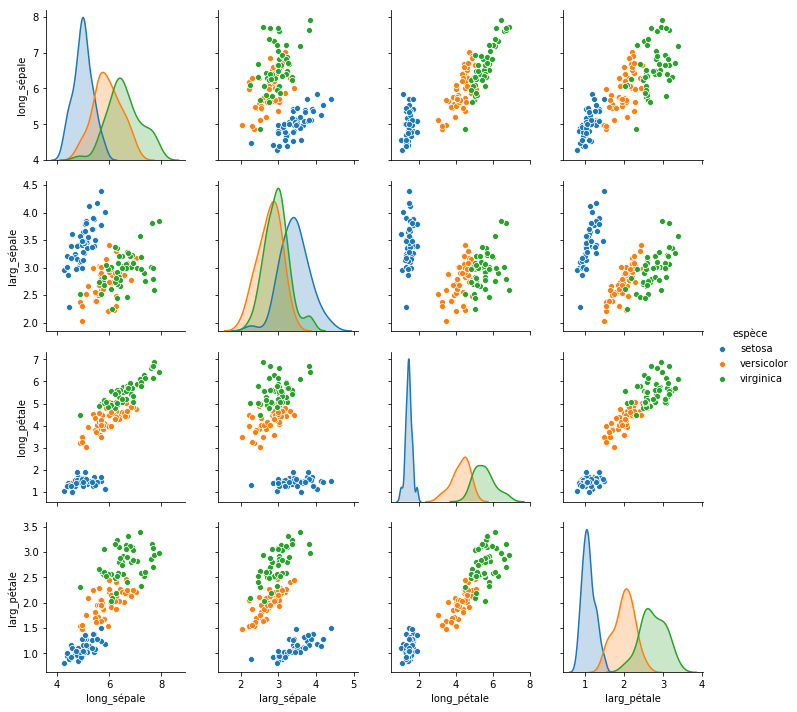

In [8]:
# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="espèce")
plt.show()

## Question 1

#### Sur le dataframe iris_dna, calculez les coefficients de corrélation linéaires suivants :
* petal_width en fonction de petal_length
* sepal_width en fonction de petal_width

##  Réponse 1  

In [9]:
coeff_CL_pét = st.pearsonr(iris_dna["larg_pétale"],iris_dna["long_pétale"])[0]
coeff_CL_larg = st.pearsonr(iris_dna["larg_sépale"],iris_dna["larg_pétale"])[0]
print("Le coefficient de corrélation linéaire largeur/longueur des pétales est : {:.3f}".format(coeff_CL_pét))
print("Le coefficient de corrélation linéaire largeur sépale/pétale des fleurs est : {:.3f}".format(coeff_CL_larg))

Le coefficient de corrélation linéaire largeur/longueur des pétales est : 0.942
Le coefficient de corrélation linéaire largeur sépale/pétale des fleurs est : -0.248


##  Question 2  

#### Commentez les résultats de la question 1 grâce aux 2 diagrammes de dispersion donnés dans l'énoncé.
#### Ensuite, gardez en tête le coefficient de corrélation linéaire de sepal_width en fonction de petal_width. Celui-ci est calculé sur l'ensemble des iris.
#### Quand on calcule les coefficients de corrélation linéaire de ces mêmes variables, mais en les séparant par espèce, on obtient les résultats suivants :
* sepal_width en fonction de petal_width sur iris_setosa : 0.753
* sepal_width en fonction de petal_width sur iris_virginica : 0.685
* sepal_width en fonction de petal_width sur iris_versicolor : 0.825

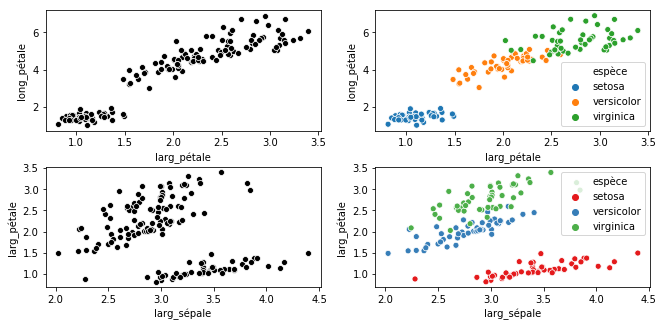

In [10]:
fig2 = plt.figure(figsize=(12,5.5))
plot2_1 = plt.subplot(2,2,1)
sns.scatterplot(x="larg_pétale", y="long_pétale", color="0", data=iris_dna)
plot2_2 = plt.subplot(2,2,2)
sns.scatterplot(x="larg_pétale", y="long_pétale", hue="espèce", data=iris_dna)
plot2_3 = plt.subplot(2,2,3)
sns.scatterplot(x="larg_sépale", y="larg_pétale", color="0", palette = "Set1", data=iris_dna)
plot2_4 = plt.subplot(2,2,4)
sns.scatterplot(x="larg_sépale", y="larg_pétale", hue="espèce", palette = "Set1", data=iris_dna)
plt.gcf().subplots_adjust(left = 0, bottom = 0, right = 0.7, top = 0.7, wspace = 0.2, hspace = 0.3)
plt.show()

##  Réponse 2  

__Longueur vs largeur des pétales__

Il y a une nette dépendance linéaire de la largeur et de la longueur des pétales, pour toutes les espèces prises ensemble. En effet, même si elles forment trois ensembles de données distincts, la dispersion des points est telle qu'ils se trouvent globalement sur une même trajectoire.

NB : On devine cependant que si l'on prenanit l'espèce "setosa" à part, la droite que l'on obtiendrait en faisant une régression linéaire entre les données longueur et largeur de pétales aurait un coefficient directeur très différent de celle trouvée pour les deux autres autres espèces prises à part.



__Largeur des sépales vs pétales__

En revanche, sur l'ensemble des données mélangées, il n'y a pas de dépendance linéaire de la largeur des sépales et de celle des pétales.
Même si les données des espèces "versicolor" et "virginica" prises ensembles pourraient paraître confondues, les données l'espèce "setosa" sont nettement sur une droite à part.

(voir bonus ci-dessous du calcul des coefficient de Pearson de chacune des espèces) :

In [11]:
coeff_CL_larg_Ve = st.pearsonr(iris_dna_Ve["larg_sépale"],iris_dna_Ve["larg_pétale"])[0]
coeff_CL_larg_Vi = st.pearsonr(iris_dna_Vi["larg_sépale"],iris_dna_Vi["larg_pétale"])[0]
coeff_CL_larg_Se = st.pearsonr(iris_dna_Se["larg_sépale"],iris_dna_Se["larg_pétale"])[0]
print("coefficient de corrélation linéaire largeur sépale/pétale des fleurs :\n \
          (Toutes espèces) : {:.3f},\n \
          Versicolor : {:.3f},\n \
          Virginia : {:.3f},\n \
          Setosa : {:.3f}".format(coeff_CL_larg , coeff_CL_larg_Ve, coeff_CL_larg_Vi, coeff_CL_larg_Se))

coefficient de corrélation linéaire largeur sépale/pétale des fleurs :
           (Toutes espèces) : -0.248,
           Versicolor : 0.825,
           Virginia : 0.685,
           Setosa : 0.753


##  Question 3

#### Réalisez 4 régressions linéaires (avec la méthode des moindres carrés). Nous utiliserons la notation suivante : Y = aX + b + epsilon

#### a et b sont les réels que vous devez estimer, epsilon le terme d'erreur (vous n'avez pas à vous en soucier), X et Y sont 2 variables.

##### Les 4 régressions linéaires correspondent à chacun de ces 4 cas (les 4 cas que nous étudions depuis le début):
* cas 1/ X est la variable petal_length et Y la variable petal_width, sur le dataframe iris_dna
* cas 2/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_setosa
* cas 3/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_virginica
* cas 4/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_versicolor

#### Donnez pour chacun des ces 4 cas les estimations de a et de b.

In [12]:

#Regression lineaire avec sklearn
##########################
#import numpy as np
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(np.array(iris_dna["long_pétale"]).reshape(-1, 1), iris_dna["larg_pétale"])

#Regression lineaire avec statsmodels.api (sm)
##########################
# Fonction réalisant la régression linéaire pour un jeu de données
def Coeff_RL(X, Y) :
    Xt = X.copy()
    Xt["intercept"] = 1.
    results = sm.OLS(Y,Xt).fit()
    return results.params.values

In [13]:
# Calcul des coefficients a et b pour chaque régression linéaire
C3_1 = Coeff_RL(iris_dna[["long_pétale"]], iris_dna[["larg_pétale"]])
C3_2 = Coeff_RL(iris_dna_Se[["larg_pétale"]], iris_dna_Se[["larg_sépale"]])
C3_3 = Coeff_RL(iris_dna_Vi[["larg_pétale"]], iris_dna_Vi[["larg_sépale"]])
C3_4 = Coeff_RL(iris_dna_Ve[["larg_pétale"]], iris_dna_Ve[["larg_sépale"]])

## Réponse 3

Les coefficients des droites obtenues par régression linéaires des quatre cas mentionnés sont résumées dans le tableau ci-dessous :

(On trouvera au-dessous l'affichage sous forme de graphique des donneés correspondantes, ainsi que les droites obtenues par régression et leur équation.)

In [14]:
coeff_df = pd.DataFrame({"a (coeff dir)": [C3_1[0],C3_2[0],C3_3[0],C3_4[0]], \
                         "b (ord orig)": [C3_1[1],C3_2[1],C3_3[1],C3_4[1]]},\
                       index = ["larg_pétale = f(long_pétale(tous))", "larg_sépale = f(larg_pétale(se))", \
                                "larg_sépale = f(larg_pétale(vi))", "larg_sépale = f(larg_pétale(ve))"])
coeff_df

,a (coeff dir),b (ord orig)
larg_pétale = f(long_pétale(tous)),0.385994,0.509268
larg_sépale = f(larg_pétale(se)),1.787501,1.459327
larg_sépale = f(larg_pétale(vi)),0.699251,1.037743
larg_sépale = f(larg_pétale(ve)),0.973570,0.809489


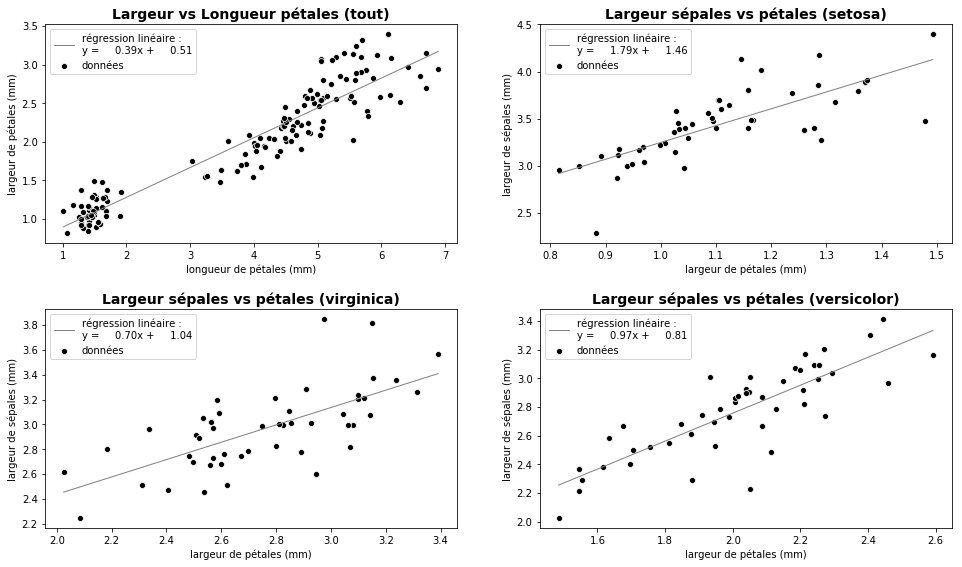

In [15]:
#Affichage des graphes : données, régression linéaire et équation de la droite correspondante
fig3 = plt.figure(figsize=(18,10))
#-----------------------------------
plot3_1 = plt.subplot(2,2,1)
sns.scatterplot(x="long_pétale", y="larg_pétale", \
                color="0", data=iris_dna,\
                label="données", zorder=5)
sns.lineplot(x=iris_dna["long_pétale"], y=iris_dna["long_pétale"]*C3_1[0]+C3_1[1], \
             linestyle = '-', color='grey', linewidth=1, \
             label="régression linéaire :\ny = {:8.2f}x + {:8.2f}".format(C3_1[0],C3_1[1]),zorder=100)
plot3_1.set_title('Largeur vs Longueur pétales (tout)',fontsize=14, fontweight='bold')
plot3_1.set_xlabel('longueur de pétales (mm)')
plot3_1.set_ylabel('largeur de pétales (mm)')
#-----------------------------------
plot3_2 = plt.subplot(2,2,2)
sns.scatterplot(x="larg_pétale", y="larg_sépale", \
                color="0", data=iris_dna_Se,\
                label="données", zorder=5)
sns.lineplot(x=iris_dna_Se["larg_pétale"], y=iris_dna_Se["larg_pétale"]*C3_2[0]+C3_2[1], \
             linestyle = '-', color='grey', linewidth=1, \
             label="régression linéaire :\ny = {:8.2f}x + {:8.2f}".format(C3_2[0],C3_2[1]),zorder=100)
plot3_2.set_title('Largeur sépales vs pétales (setosa)',fontsize=14, fontweight='bold')
plot3_2.set_xlabel('largeur de pétales (mm)')
plot3_2.set_ylabel('largeur de sépales (mm)')
#-----------------------------------
plot3_3 = plt.subplot(2,2,3)
sns.scatterplot(x="larg_pétale", y="larg_sépale", \
                color="0", data=iris_dna_Vi,\
                label="données", zorder=5)
sns.lineplot(x=iris_dna_Vi["larg_pétale"], y=iris_dna_Vi["larg_pétale"]*C3_3[0]+C3_3[1], \
             linestyle = '-', color='grey', linewidth=1, \
             label="régression linéaire :\ny = {:8.2f}x + {:8.2f}".format(C3_3[0],C3_3[1]),zorder=100)
plot3_3.set_title('Largeur sépales vs pétales (virginica)',fontsize=14, fontweight='bold')
plot3_3.set_xlabel('largeur de pétales (mm)')
plot3_3.set_ylabel('largeur de sépales (mm)')
#-----------------------------------
plot3_4 = plt.subplot(2,2,4)
sns.scatterplot(x="larg_pétale", y="larg_sépale", \
                color="0", data=iris_dna_Ve,\
                label="données", zorder=5)
sns.lineplot(x=iris_dna_Ve["larg_pétale"], y=iris_dna_Ve["larg_pétale"]*C3_4[0]+C3_4[1], \
             linestyle = '-', color='grey', linewidth=1, \
             label="régression linéaire :\ny = {:8.2f}x + {:8.2f}".format(C3_4[0],C3_4[1]),zorder=100)
plot3_4.set_title('Largeur sépales vs pétales (versicolor)',fontsize=14, fontweight='bold')
plot3_4.set_xlabel('largeur de pétales (mm)')
plot3_4.set_ylabel('largeur de sépales (mm)')

plt.gcf().subplots_adjust(left = 0, bottom = 0, right = 0.7, top = 0.7, wspace = 0.2, hspace = 0.3)

plt.show()

## Question 4

#### Voici les 4 lignes contenant des données manquantes :

#### Pour chaque individu, la valeur manquante se trouve soit dans la variable petal_width soit dans la variable sepal_width. Dans ces 2 cas, on peut imputer (remplir) ces valeurs grâce aux régressions linéaires que nous avons étudiées précédemment. Ces valeurs seront approchées mais fausses.
#### En supposant qu'un individu n'a jamais plus d'une valeur manquante, voici le code qui remplace les valeurs manquantes grâce aux régressions linéaires. Des bouts de code ont été supprimés et remplacés par "[...]" : à vous de les retrouver. 

##  Réponse 4

On a déjà calculé auparavant les coefficients, qu'on renseigne ici :

In [16]:
coeffs = {
    "cas 1" : {'a': C3_1[0] , 'b': C3_1[1]},
    "cas 2" : {'a': C3_2[0] , 'b': C3_2[1]},
    "cas 3" : {'a': C3_3[0] , 'b': C3_3[1]},
    "cas 4" : {'a': C3_4[0] , 'b': C3_4[1]},
}

coeffs

{'cas 1': {'a': 0.38599421003086465, 'b': 0.5092683365300003},
 'cas 2': {'a': 1.7875014940283396, 'b': 1.4593274917352779},
 'cas 3': {'a': 0.6992505959712975, 'b': 1.0377429413261892},
 'cas 4': {'a': 0.9735704312621848, 'b': 0.8094893720788445}}

Puis on rempli le vide dans le code donné :
pour chaque largeur de pétale manquante, on détermine l'espèce de l'individu correspondant, puis on calcul la largeur de pétale à partir de l'équation y = ax+b correspondant à la régression linéaire trouvée plus haut.

In [17]:
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["larg_pétale"]): #... on teste si l'individu["larg_pétale"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["long_pétale"]
        Y = a*X + b
        iris.loc[i,"larg_pétale"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété larg_pétale par {} \n à partir de long_pétale = {}".format(Y,X)) 
    if pd.isnull(individu["larg_sépale"]): # on teste si l'individu ("larg_sépale") est nul.
        espece = individu["espèce"]
        X = individu["larg_pétale"]
        if espece == "setosa" :   # traitement différent selon l'espèce
            a = coeffs["cas 2"]['a']
            b = coeffs["cas 2"]['b']
        elif espece == "virginica" :
            a = coeffs["cas 3"]['a']
            b = coeffs["cas 3"]['b']
        elif espece == "versicolor" :
            a = coeffs["cas 4"]['a']
            b = coeffs["cas 4"]['b']
        else :
            print ("erreur")
        Y = a*X + b       # calcul de la valeur de Y en utilisant les coeff propres à chaque espèce
        iris.loc[i,"larg_sépale"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété larg_sépale par {} \n à partir de l'espece:{} et de larg_pétale={}".format(Y,espece,X))

On a complété larg_sépale par 3.2510181164082854 
 à partir de l'espece:setosa et de larg_pétale=1.0023435676326218
On a complété larg_pétale par 2.0639904746744127 
 à partir de long_pétale = 4.027837977207209
On a complété larg_sépale par 3.009714075281927 
 à partir de l'espece:versicolor et de larg_pétale=2.259954321281721
On a complété larg_sépale par 3.360564196480711 
 à partir de l'espece:virginica et de larg_pétale=3.3218723995908728


Voici un tableau récapitulatif des lignes complétées :

In [18]:
# Affichage des points complétés par calcul (tableau)
iris_new = pd.concat([iris, iris_dna]).drop_duplicates(keep=False)
iris_new

,long_sépale,larg_sépale,long_pétale,larg_pétale,espèce
3,4.603747,3.251018,1.480616,1.002344,setosa
53,5.442775,2.340928,4.027838,2.063990,versicolor
61,5.879497,3.009714,4.181942,2.259954,versicolor
100,6.230628,3.360564,6.001908,3.321872,virginica


Pour vérification, on affiche les points complétés sur le graphe :

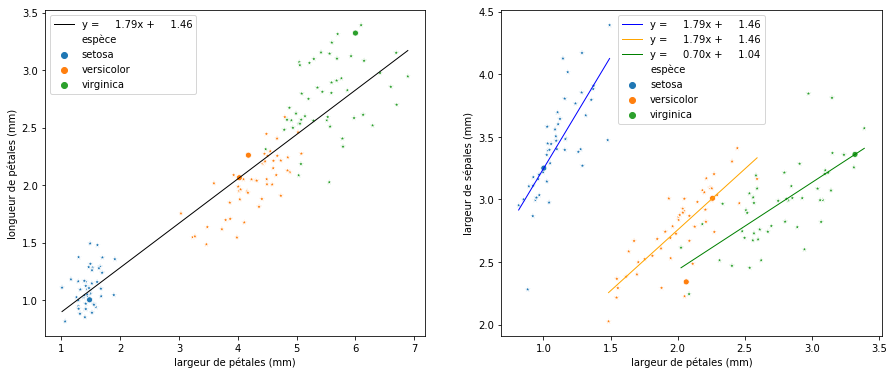

In [19]:
# Affichage des points complétés par calcul (graphe)

fig4 = plt.figure(figsize=(15,6))

plot4_1 = plt.subplot(1,2,1)
sns.scatterplot(x="long_pétale", y="larg_pétale", color="0", marker = "*", hue = "espèce", data=iris, zorder = 10, legend = None)
sns.scatterplot(x="long_pétale", y="larg_pétale", color="blue", hue = "espèce", data=iris_new, zorder = 100)
sns.lineplot(x=iris_dna["long_pétale"], y=iris_dna["long_pétale"]*C3_1[0]+C3_1[1], \
             linestyle = '-', color='0', linewidth=1, \
             label="y = {:8.2f}x + {:8.2f}".format(C3_2[0],C3_2[1]),zorder=200)
plot4_1.set_xlabel('largeur de pétales (mm)')
plot4_1.set_ylabel('longueur de pétales (mm)')

plot4_2 = plt.subplot(1,2,2)
sns.scatterplot(x="larg_pétale", y="larg_sépale", color="0", marker = "*", hue = "espèce", data=iris, zorder = 10, legend = None)
sns.scatterplot(x="larg_pétale", y="larg_sépale", color="blue", hue = "espèce", data=iris_new, zorder = 100)
sns.lineplot(x=iris_dna_Se["larg_pétale"], y=iris_dna_Se["larg_pétale"]*C3_2[0]+C3_2[1], \
             linestyle = '-', color='blue', linewidth=1, \
             label="y = {:8.2f}x + {:8.2f}".format(C3_2[0],C3_2[1]),zorder=200)
sns.lineplot(x=iris_dna_Ve["larg_pétale"], y=iris_dna_Ve["larg_pétale"]*C3_4[0]+C3_4[1], \
             linestyle = '-', color='orange', linewidth=1, \
             label="y = {:8.2f}x + {:8.2f}".format(C3_2[0],C3_2[1]),zorder=400)
sns.lineplot(x=iris_dna_Vi["larg_pétale"], y=iris_dna_Vi["larg_pétale"]*C3_3[0]+C3_3[1], \
             linestyle = '-', color='green', linewidth=1, \
            label="y = {:8.2f}x + {:8.2f}".format(C3_3[0],C3_3[1]),zorder=300)
plot4_2.set_xlabel('largeur de pétales (mm)')
plot4_2.set_ylabel('largeur de sépales (mm)')
plt.show()

On constate que le point dont la longueur de pétale manquait est sur la droite de régression, et bien placé par rapport au nuage.
Les trois points correspondant aux largeurs de sépales manquantes pour chaque espèce sont également bien placés.